# **Build Model**
https://github.com/theanhtran372000/Vietnamese-News-Classification/blob/main/4.PhoBERT.ipynb



## **Install Library**

In [ ]:
pip install pip==23.2.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
pip install -q pyvi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.8 MB/s eta 0:00:00


In [ ]:
!pip3 install -q fairseq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 44.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 21.6 MB/s eta 0:00:00
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers

In [ ]:
!pip3 install -q fastbpe

  Preparing metadata (setup.py) ... done
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
!pip3 install -q transformers

DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
!pip install -q underthesea

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 31.0 MB/s eta 0:00:00
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
pip install -U -q flask-cors

DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
!pip install -q pytorch-model-summary

DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


## **Import Library**

In [ ]:
import sys
import os
import numpy as np
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
import time
import random
import seaborn as sns
from tqdm import tqdm
from tqdm.notebook import tqdm
import argparse

from flask import Flask, request,render_template,jsonify
from flask_cors import CORS
import flask

from pyvi import ViTokenizer
from wordcloud import WordCloud, STOPWORDS

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
from torch.nn import functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.optim.lr_scheduler import StepLR
from torch.backends import cudnn
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, f1_score, classification_report, accuracy_score
from sklearn.utils import class_weight, resample, shuffle
from sklearn.manifold import TSNE

from collections import Counter
from imblearn.over_sampling import SMOTE
from underthesea import word_tokenize
import pickle

from fairseq.models.roberta import RobertaModel
from fairseq.data.encoders.fastbpe import fastBPE
from fairseq.data import Dictionary
from transformers.modeling_utils import *
from transformers import AdamW, get_linear_schedule_with_warmup, get_constant_schedule
from transformers import AutoModel, AutoTokenizer

import argparse

app = Flask(__name__)
CORS(app)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***Load Data***

In [ ]:
#data = pd.read_excel('/content/drive/MyDrive/ESG/Code/data.xlsx', usecols=lambda x: x != 'Unnamed: 0')

In [ ]:
#data

,name,year,text,old_label,old_label_2,label
0,Ngân hàng NN&PT Nông thôn Việt Nam,2023,"Đây là sự kiện quan trọng, có ý nghĩa to lớn đ...",S0,S0,S0
1,Ngân hàng NN&PT Nông thôn Việt Nam,2023,Tiên phong thể hiện trách nhiệm của Ngân hàng ...,S3,S3,S3
2,Ngân hàng NN&PT Nông thôn Việt Nam,2023,Agribank nghiêm túc triển khai các chương trìn...,S3,S3,S3
3,Ngân hàng NN&PT Nông thôn Việt Nam,2023,Đây là tiền đề để Agribank nâng cao năng lực t...,G3,G3,G3
4,Ngân hàng NN&PT Nông thôn Việt Nam,2023,Triển khai các giải pháp nâng cao năng lực điề...,G3,G3,G3
...,...,...,...,...,...,...
5281,Ngân hàng TMCP Quân đội,2023,"Số giờ đào tạo bình quân năm 2023: 51,22 giờ (...",S0,S0,S0
5282,Ngân hàng TMCP Quân đội,2023,Tiến bước kiến tạo giá trị bền vững 112 113 Bá...,E3,E3,E3
5283,Ngân hàng TMCP Quân đội,2023,Trách nhiệm với chính ngân hàng: nâng cao năng...,G3,G3,G3
5284,Ngân hàng TMCP Quân đội,2023,"Trách nhiệm với xã hội: thúc đẩy bình đẳng, tô...",S3,S3,S3


In [ ]:
## Bỏ các nhãn "I"
#data_filtered = data[~data['label'].str.startswith('I')]

## Encode lại nhãn
#def encode_label(label):
#    if label[-1] in "0123":
#        return label[-1]
#    return label

#data_filtered['label'] = data_filtered['label'].apply(encode_label)

## Lưu lại thành tập data_2
#data_filtered.to_excel('/content/drive/MyDrive/ESG/Code/data_2.xlsx', index=False)


<ipython-input-6-7c94d0af886d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['label'] = data_filtered['label'].apply(encode_label)


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/ESG/Code/data_2.xlsx', usecols=lambda x: x != 'Unnamed: 0')

In [ ]:
df

,name,year,text,old_label,old_label_2,label
0,Ngân hàng NN&PT Nông thôn Việt Nam,2023,"Đây là sự kiện quan trọng, có ý nghĩa to lớn đ...",S0,S0,3
1,Ngân hàng NN&PT Nông thôn Việt Nam,2023,Tiên phong thể hiện trách nhiệm của Ngân hàng ...,S3,S3,3
2,Ngân hàng NN&PT Nông thôn Việt Nam,2023,Agribank nghiêm túc triển khai các chương trìn...,S3,S3,3
3,Ngân hàng NN&PT Nông thôn Việt Nam,2023,Đây là tiền đề để Agribank nâng cao năng lực t...,G3,G3,3
4,Ngân hàng NN&PT Nông thôn Việt Nam,2023,Triển khai các giải pháp nâng cao năng lực điề...,G3,G3,3
...,...,...,...,...,...,...
3133,Ngân hàng TMCP Quân đội,2023,"Số giờ đào tạo bình quân năm 2023: 51,22 giờ (...",S0,S0,0
3134,Ngân hàng TMCP Quân đội,2023,Tiến bước kiến tạo giá trị bền vững 112 113 Bá...,E3,E3,3
3135,Ngân hàng TMCP Quân đội,2023,Trách nhiệm với chính ngân hàng: nâng cao năng...,G3,G3,3
3136,Ngân hàng TMCP Quân đội,2023,"Trách nhiệm với xã hội: thúc đẩy bình đẳng, tô...",S3,S3,3


In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_df.to_excel('/content/drive/MyDrive/ESG/Code/train_df.xlsx', index = False)
test_df.to_excel('/content/drive/MyDrive/ESG/Code/test_df.xlsx', index = False)

In [ ]:
train_df.label.value_counts()

,count
label,
3,1368
0,713
1,323
2,106


In [ ]:
df.label.value_counts()

,count
label,
3,1663
0,924
1,412
2,139


In [ ]:
#np.mean(question['num_word'])

In [ ]:
# plt.hist(list(question['num_word']), bins = 10)

## **Preprocessing Text./**

In [ ]:
test_dir = '/content/drive/MyDrive/ESG/Code/test_df.xlsx'
train_dir = '/content/drive/MyDrive//ESG/Code/train_df.xlsx'

In [ ]:
test_df = pd.read_excel(test_dir, usecols=lambda x: x != 'Unnamed: 0')
train_df = pd.read_excel(train_dir, usecols=lambda x: x != 'Unnamed: 0')

In [ ]:
test_df

,name,year,text,old_label,old_label_2,label
0,Ngân hàng TMCP Quốc dân,2021,Có thể kể đến các sản phẩm tín dụng tiêu biểu ...,S0,S3,3
1,Ngân hàng TMCP Hàng Hải,2022,Mở rộng quan hệ đối tác và hệ sinh thái: Hợp t...,G3,G3,3
2,Ngân hàng NN&PT Nông thôn Việt Nam,2021,Đẩy mạnh các hoạt động dịch vụ ngân hàng điện ...,S3,S3,3
3,Ngân hàng TMCP Việt Nam Thịnh Vượng,2017,Về hoạt động thể hiện trách nhiệm xã hội của d...,S0,S0,0
4,Ngân hàng TMCP Việt Nam Thịnh Vượng,2022,VPBank tuân thủ các quy định của pháp luật về ...,E0,E0,1
...,...,...,...,...,...,...
623,Ngân hàng TMCP Hàng Hải,2020,"MSB đã triển khai văn phòng làm việc thay thế,...",S0,S0,0
624,Ngân hàng TMCP Ngoại Thương Việt Nam,2016,"Cụ thể, hiện nay một số biểu mẫu yêu cầu cung ...",E3,E3,0
625,Ngân hàng TMCP Sài Gòn Thương Tín,2018,trang Hào khí Sacombank đã phát triển ứng dụng...,S0,S0,0
626,Ngân hàng TMCP Hàng Hải,2015,"Trong năm, Maritime Bank đã tổ chức hơn 205 kh...",S0,S0,0


In [ ]:
train_df

,name,year,text,old_label,old_label_2,label
0,Ngân hàng TMCP Ngoại Thương Việt Nam,2016,Người lao động mới tuyển được đảm bảo đúng quy...,S3,S3,3
1,Ngân hàng TMCP Quốc dân,2021,"Năm 2022, Khối KHDN dự kiến tiến hành phát tri...",S2,S2,2
2,Ngân hàng TMCP Ngoại Thương Việt Nam,2016,"Nhìn chung, trong năm 2016, HĐQT và BĐH đã chỉ...",G0,G0,0
3,Ngân hàng TMCP Ngoại Thương Việt Nam,2021,"Năm 2021, trước ảnh hưởng tiêu cực của dịch bệ...",E0,E0,0
4,Ngân hàng NN&PT Nông thôn Việt Nam,2022,Agribank phát triển dịch vụ thanh toán theo hư...,S3,S3,3
...,...,...,...,...,...,...
2505,Ngân hàng TMCP Quân đội,2023,Thực hiện Chiến lược ESG và lộ trình chuyển đổ...,E3,E3,3
2506,Ngân hàng TMCP Ngoại Thương Việt Nam,2020,Tiếng ồn Không phát sinh chú trọng thực hiện t...,E3,E3,3
2507,Ngân hàng TMCP Ngoại Thương Việt Nam,2020,"Năm 2019, Vietcombank cũng là ngân hàng đầu ti...",E0,E3,3
2508,Ngân hàng TMCP Ngoại Thương Việt Nam,2017,"Khi thẩm định cấp tín dụng cho các dự án, Viet...",S3,S3,3


**Preprocessing:**

1) Xóa HTML code

2) Chuẩn hóa bảng mã Unicode

3) Chuẩn hóa kiểu gõ dấu tiếng việt

4) Tách từ tiếng Việt

5) Đưa về dạng viết thường

6) Xóa ký tự đặc biệt

#### ***Đặt hàm xử lý text***

In [ ]:
'''
Xóa HTML code
'''
def remove_html(text):
    return re.sub(r'<[^>]*>', '', text)

In [ ]:
'''
Chuẩn hóa bảng mã Unicode
  * Đưa hết những câu trong dataset về thành kiểu Unicode dựng sẵn.
'''
uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

# Hàm tạo dict để convert định dạng cũ sang định dạng mới
def loaddicchar():
  dic = {}
  char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split('|')
  charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split('|')
  for i in range(len(char1252)):
      dic[char1252[i]] = charutf8[i]
  return dic

dicchar = loaddicchar()

# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def convert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [ ]:
'''
Chuẩn hóa kiểu gõ dấu tiếng Việt & đưa về dạng thường
  - Lỗi gõ dấu thường xảy ra do cách đánh máy của người viết báo
  - Chuyển các từ về dạng viết thường sẽ giảm số lượng đặc trưng mà mô hình phải học => tăng độ chính xác model
'''
# Danh sách nguyên âm với các dấu tương ứng
bang_nguyen_am = [['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a'],
                  ['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
                  ['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
                  ['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e'],
                  ['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
                  ['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i'],
                  ['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o'],
                  ['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'oo'],
                  ['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
                  ['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u'],
                  ['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
                  ['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y']]

# Bảng chứa ký tự dấu ứng: dấu trắng, dấu huyền, sắc, hỏi, ngã, nặng ứng với các cột bên trên
bang_ky_tu_dau =  [ '', 'f', 's', 'r', 'x', 'j']

# dict để chuyển ký tự unicode sang chỉ số (i, j) trong đó i đặc trưng cho nguyên âm nào còn j đặc trưng cho dấu
nguyen_am_to_ids = {}

# Khởi tạo dict
for i in range(len(bang_nguyen_am)):
    for j in range(len(bang_nguyen_am[i]) - 1):
        nguyen_am_to_ids[bang_nguyen_am[i][j]] = (i, j)

# Kiểm tra tính hợp lệ của một từ tiếng Việt đã được gõ đúng hay chưa dựa trên tính chất là:
# Các nguyên âm trong tiếng việt sẽ đứng cạnh nhau tạo thành cụm và mỗi từ chỉ có tối đa 1 cụm nguyên âm
# Ví dụ: Nguyễn -> Ng(uyễ)n, Thắng -> Th(ắ)ng, Hảo -> H(ảo)
def is_valid_vietnam_word(word):
    chars = list(word)
    nguyen_am_index = -1

    # duyệt từng ký tự trong word
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1)) # x xác định nguyên âm nào còn y sẽ xác định dấu ứng với nguyên âm đó
        if x != -1: # nếu char là nguyên âm
            if nguyen_am_index == -1: # nếu chưa tìm thấy nguyên âm
                nguyen_am_index = index
            else:                     # đã tìm thấy nguyên âm
                if index - nguyen_am_index != 1: # nếu nguyên âm tìm thấy ko nằm cạnh nguyên âm đã tìm thấy
                    return False
                nguyen_am_index = index
    return True

print("Nguyene: ", is_valid_vietnam_word("Nguyene"))
print('Nguyễn: ', is_valid_vietnam_word('Nguyễn'))

Nguyene:  False
Nguyễn:  True


In [ ]:
# Thực hiện chuẩn hóa dấu cho từng từ trong tiếng Việt
def chuan_hoa_dau_tu_tieng_viet(word):
    # Nếu là invalid word thì sẽ không xử lý bao gồm từ tiếng anh, số, từ gõ sai, ...
    if not is_valid_vietnam_word(word):
        return word

    chars = list(word)
    dau_cau = 0
    nguyen_am_index = []
    qu_or_gi = False

    # Duyệt qua từng ký tự
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1: # Nếu char là phụ âm
            continue

        elif x == 9:  # check 'qu'
            if index != 0 and chars[index - 1] == 'q':
                chars[index] = 'u'
                qu_or_gi = True

        elif x == 5:  # check 'gi'
            if index != 0 and chars[index - 1] == 'g':
                chars[index] = 'i'
                qu_or_gi = True

        if y != 0:  # nếu có dấu
            dau_cau = y
            chars[index] = bang_nguyen_am[x][0] # bỏ dấu

        # Nếu không phải trường hợp 'qu' hoặc 'gi' hoặc là index khác 1 (có nguyên âm từ ký tự thứ 3 trở đi)
        if not qu_or_gi or index != 1:
            nguyen_am_index.append(index)

    if len(nguyen_am_index) < 2:
        if qu_or_gi:
            if len(chars) == 2:
                x, y = nguyen_am_to_ids.get(chars[1])
                chars[1] = bang_nguyen_am[x][dau_cau]
            else:
                x, y = nguyen_am_to_ids.get(chars[2], (-1, -1))
                if x != -1:
                    chars[2] = bang_nguyen_am[x][dau_cau]
                else:
                    chars[1] = bang_nguyen_am[5][dau_cau] if chars[1] == 'i' else bang_nguyen_am[9][dau_cau]
            return ''.join(chars)
        return word

    for index in nguyen_am_index:
        x, y = nguyen_am_to_ids[chars[index]]
        if x == 4 or x == 8:  # ê, ơ
            chars[index] = bang_nguyen_am[x][dau_cau]
            return ''.join(chars)

    if len(nguyen_am_index) == 2:
        if nguyen_am_index[-1] == len(chars) - 1:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            chars[nguyen_am_index[0]] = bang_nguyen_am[x][dau_cau]
        else:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    else:
        x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
        chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    return ''.join(chars)

# Thực hiện chuẩn hóa cho cả câu tiếng Việt và đưa câu đó về dạng viết thường
def chuan_hoa_dau_cau_tieng_viet(sentence):
    sentence = sentence.lower() # Chuyển về dạng lowercase
    words = sentence.split()

    # thực hiện xử lý trên từng từ
    for index, word in enumerate(words):
        cw = re.sub(r'^([b-dđghklmnpqrstv-xzB-DĐGHKLMNPQRSTV-XZ]*)([aăâeêioôơuưy]*[aăâeêioôơuưy]{1}[aăâeêioôơuưy]*)([b-dđghklmnpqrstv-xzB-DĐGHKLMNPQRSTV-XZ]*)$', r'\1/\2/\3', word).split('/')
        if len(cw) == 3:
            cw[1] = chuan_hoa_dau_tu_tieng_viet(cw[1])
        words[index] = ''.join(cw)
    return ' '.join(words)

print(chuan_hoa_dau_cau_tieng_viet('đường mật có hại không? không Ai BiẾt. Chúng TôI cHỉ BiếT là KiẾn thích đườNg'))

đường mật có hại không? không ai biết. chúng tôi chỉ biết là kiến thích đường


In [ ]:
'''
Tách từ tiếng việt:
  - Đơn vị từ có từ đơn & từ ghép => tăng chính xác đáng kể khi không cần học sự liên kết giữa 2 từ trong 1 từ ghép
  - Nối 2 từ lại
  => sử dụng undersea
'''
sentence = 'Có một con bò ở trên cành cây.'
print(word_tokenize(sentence))
print(word_tokenize(sentence, format='text'))

['Có', 'một', 'con', 'bò', 'ở', 'trên', 'cành', 'cây', '.']
Có một con bò ở trên cành cây .


In [ ]:
'''
Xóa các ký tự không cần thiết:
  - Giảm chiều đặc trưng, tăng tốc độ học, xử lý
  - Tránh gây nhiễu cho mô hình
Loại bỏ những ký tự không cần thiết như dấu ngắt câu '\n' và các ký tự đặc biệt.
'''
def remove_unnecessary_charactor(document):
    # xóa các ký tự không cần thiết
    document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',document)
    # xóa khoảng trắng thừa
    document = re.sub(r'\s+', ' ', document).strip()
    return document

**Hàm tổng hợp preprocessing text**

In [ ]:
def text_preprocessing(document):
  # xóa html
  document = remove_html(document)
  # chuẩn hóa unicode
  document = convert_unicode(document)
  # chuẩn hóa các gõ dấu và đưa về dạng viết thường
  document = chuan_hoa_dau_cau_tieng_viet(document)
  # tách từ
  document = word_tokenize(document, format='text')
  # xóa bỏ ký tự không cần thiết
  document = remove_unnecessary_charactor(document)
  return document

In [ ]:
text_preprocessing(df.text[0])

'đây là sự_kiện quan_trọng có ý_nghĩa to_lớn đối_với agribank ghi_dấu hành_trình 35 năm xây_dựng và trưởng_thành đồng_thời là sự ghi_nhận của đảng nhà_nước đối_với những đóng_góp tích_cực của agribank cho công_cuộc phát_triển kinh_tế xã_hội đất_nước đặc_biệt sự_nghiệp phát_triển tam_nông qua đó tiếp_tục khẳng_định thương_hiệu agrib ank và giá_trị truyền_thống văn_hóa agribank rất đáng tự_hào'

#### ***Xử lý text***

In [ ]:
test_df['text'] = test_df['text'].apply(text_preprocessing)
train_df['text'] = train_df['text'].apply(text_preprocessing)

#### ***Loại Stopwords:*** *chưa chắc đã cần*

In [ ]:
# Tạo bảng tần số của các từ
count = {}
print('Processing news ...')
for content in train_df['text'].astype(str).tolist() + test_df['text'].astype(str).tolist():
    words = content.split(' ')
    for word in words:
        if word not in count:
            count[word] = 1
        else:
            count[word] += 1

print('Number of words in dataset: ', len(count))

Processing news ...
Number of words in dataset:  5142


In [ ]:
sorted_count = sorted(count, key=count.get, reverse=True)
# top 100 từ xuất hiện nhiều nhất
for word in np.array(sorted_count)[:5]:
    print(f'{word} - {count[word]}')

và - 3083
các - 3019
của - 1768
cho - 1431
trong - 1285


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Kết hợp dữ liệu train và test để tính TF-IDF
all_texts = train_df['text'].astype(str).tolist() + test_df['text'].astype(str).tolist()

# Khởi tạo TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Tính TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(all_texts)

# Lấy danh sách các từ (từ vựng) và trọng số của chúng
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1  # Tổng TF-IDF của từng từ

# Tạo bảng từ và trọng số TF-IDF
count_2 = dict(zip(tfidf_feature_names, tfidf_scores))

print('Number of words in dataset:', len(count_2))


Number of words in dataset: 5105


In [ ]:
# Sắp xếp từ điển `count` dựa trên trọng số TF-IDF theo thứ tự giảm dần
sorted_count = sorted(count_2, key=count_2.get, reverse=True)

# Hiển thị 30 từ có trọng số TF-IDF cao nhất
print("Top 30 từ có trọng số TF-IDF cao nhất:")
for word in sorted_count[:30]:
    print(f'{word} - {count_2[word]}')

Top 30 từ có trọng số TF-IDF cao nhất:
các - 167.48053666231283
và - 162.00974314866536
của - 120.3776599137145
cho - 104.93959774633655
khách_hàng - 99.56800677557675
trong - 95.68676473455899
được - 93.1614910798602
với - 93.12296731712809
ngân_hàng - 86.41347815504372
phát_triển - 75.76685127955946
hoạt_động - 75.16381962021646
năm - 73.99797926088382
đã - 68.6471384894241
cao - 64.73768847410804
dịch_vụ - 62.761953543500574
về - 59.83357252866125
agribank - 59.461959616673695
triển_khai - 58.273030399352386
lao_động - 57.91579239647041
có - 57.833463879719666
rủi_ro - 57.432669226668054
đào_tạo - 57.25189535630386
để - 56.30741771063468
là - 55.480439017022725
vietcombank - 55.35510282533138
xây_dựng - 54.257738626493804
thực_hiện - 53.91638429512768
chương_trình - 52.89496618889212
nâng - 52.36161432802053
việc - 51.985551798258


In [ ]:
'''
Import Vietnamese stopwords: '/content/drive/MyDrive/ESG/Code/vietnamese-stopwords-dash (1).txt'
'''
def import_file(filename):
    with open(filename, 'r') as file:
        content = file.readlines()
    # Remove trailing newline characters
    content = [line.rstrip('\n') for line in content]
    return content

# Provide the filename of the text file you want to import
file_name = '/content/drive/MyDrive/ESG/Code/vietnamese-stopwords-dash (1).txt'
file_contents = import_file(file_name)

# Now you can use the file_contents list containing the lines of the text file
print(file_contents)


['\ufeffvà', 'các', 'của', 'trong', 'cho', 'được', 'với', 'những', 'đó', 'sự', 'cũng', 'này', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', 'mà', 'hoặc', 'động', 'năm', 'hoạt', 'có', 'là', 'về', 'để', 'từ', 'một', 'ngân_hàng', 'theo', 'trên', 'sacombank', 'đó', 'cũng', 'hàng', 'này', 'qua', 'seabank', 'nào', 'techcombank', 'tháng', 'cid', 'như', 'việc', 'khác', 'khi', 'đến', 'vietinbank', 'tại', 'nhằm', 'đồng', 'tỷ', 'bên', 'cạnh', 'sau', 'chúng_tôi', 'abbank', 'eximbank', 'việt_nam', 'kinh_doanh', 'vpbank', 'vietcombank', 'đến', 'agribank', 'vcb', 'mb', 'bvbank', 'msb', 'nam_á_bank', 'ncb', 'saigonbank', 'nab', 'sgb', 'agib_ank', 'bản_việt', 'abic', 'digimi', 'amc', 'maritime', 'mdb', 'mbbank', 'gami', 'nam_á', 'mizuho']


In [ ]:
stopwords = set()
for word in file_contents:
  stopwords.add(word)

In [ ]:
import re

def remove_stopwords(document):
    words = document.split(' ')
    res = []
    for word in words:
        # Remove numbers from the word using regex
        word_without_numbers = re.sub(r'\d', '', word)
        if word_without_numbers not in stopwords:
            res.append(word_without_numbers)
    return ' '.join(res)

In [ ]:
# Kiểm tra
remove_stopwords(text_preprocessing('Theo nghị định đã ban hành, người dân cần ở trong nhà đến hết ngày 16/9.'))

'nghị_định đã ban_hành người_dân cần ở nhà hết ngày '

In [ ]:
# Thực hiện trên toàn bộ dữ liệu
print('Processing training set ... ')
for i, row in tqdm(train_df.iterrows(), total=train_df.shape[0]):
    train_df.at[i, 'text'] = remove_stopwords(row['text'])

Processing training set ... 


  0%|          | 0/2510 [00:00<?, ?it/s]

In [ ]:
print('Processing testing set ... ')
for i, row in tqdm(test_df.iterrows(), total=test_df.shape[0]):
    test_df.at[i, 'text'] = remove_stopwords(row['text'])

Processing testing set ... 


  0%|          | 0/628 [00:00<?, ?it/s]

In [ ]:
# Remove rows with empty or whitespace-only values in 'text' column
train_df = train_df[train_df['text'].str.strip().astype(bool)]
test_df = test_df[test_df['text'].str.strip().astype(bool)]

train_df = train_df.reset_index(drop = True)
test_df = test_df.reset_index(drop = True)

In [ ]:
train_df

,name,year,text,old_label,old_label_2,label
0,Ngân hàng TMCP Ngoại Thương Việt Nam,2016,người lao_động mới tuyển đảm_bảo đúng quy_định...,S3,S3,3
1,Ngân hàng TMCP Quốc dân,2021,khối khdn dự_kiến tiến_hành phát_triển sản_ph...,S2,S2,2
2,Ngân hàng TMCP Ngoại Thương Việt Nam,2016,nhìn_chung hđqt và bđh đã chỉ_đạo điều_hành h...,G0,G0,0
3,Ngân hàng TMCP Ngoại Thương Việt Nam,2021,trước ảnh_hưởng tiêu_cực dịch_bệnh covid toà...,E0,E0,0
4,Ngân hàng NN&PT Nông thôn Việt Nam,2022,phát_triển dịch_vụ thanh_toán hướng đa kênh đa...,S3,S3,3
...,...,...,...,...,...,...
2505,Ngân hàng TMCP Quân đội,2023,thực_hiện chiến_lược esg và lộ_trình chuyển_đổ...,E3,E3,3
2506,Ngân hàng TMCP Ngoại Thương Việt Nam,2020,tiếng ồn không phát_sinh chú_trọng thực_hiện t...,E3,E3,3
2507,Ngân hàng TMCP Ngoại Thương Việt Nam,2020,đầu_tiên hợp_tác quốc_tế nhật_bản jbic cấp kh...,E0,E3,3
2508,Ngân hàng TMCP Ngoại Thương Việt Nam,2017,thẩm_định cấp tín_dụng dự_án thực_hiện đánh_gi...,S3,S3,3


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         2510 non-null   object
 1   year         2510 non-null   int64 
 2   text         2510 non-null   object
 3   old_label    2510 non-null   object
 4   old_label_2  2510 non-null   object
 5   label        2510 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 117.8+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         628 non-null    object
 1   year         628 non-null    int64 
 2   text         628 non-null    object
 3   old_label    628 non-null    object
 4   old_label_2  628 non-null    object
 5   label        628 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 29.6+ KB


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Kết hợp dữ liệu train và test để tính TF-IDF
all_texts = train_df['text'].astype(str).tolist() + test_df['text'].astype(str).tolist()

# Khởi tạo TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Tính TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(all_texts)

# Lấy danh sách các từ (từ vựng) và trọng số của chúng
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1  # Tổng TF-IDF của từng từ

# Tạo bảng từ và trọng số TF-IDF
count_3 = dict(zip(tfidf_feature_names, tfidf_scores))

print('Number of words in dataset:', len(count_3))


Number of words in dataset: 4693


In [ ]:
# Sắp xếp từ điển `count` dựa trên trọng số TF-IDF theo thứ tự giảm dần
sorted_count = sorted(count_3, key=count_3.get, reverse=True)

# Hiển thị 30 từ có trọng số TF-IDF cao nhất
print("Top 30 từ có trọng số TF-IDF cao nhất:")
for word in sorted_count[:31]:
    print(f'{word} - {count_3[word]}')

Top 30 từ có trọng số TF-IDF cao nhất:
và - 173.93722382359573
khách_hàng - 106.4808294433792
hoạt_động - 81.64931589549029
phát_triển - 81.64931502075386
đã - 76.18927616183227
cao - 68.80693406794973
dịch_vụ - 67.02670222847244
triển_khai - 62.91991443656946
đào_tạo - 62.518714504384846
lao_động - 61.88610880087946
rủi_ro - 61.14722039022106
xây_dựng - 58.37978009430515
thực_hiện - 58.32845754693823
chương_trình - 57.67000788918164
nâng - 55.75512324259947
người - 54.05122604373601
hệ_thống - 53.20192602822067
sản_phẩm - 52.12533816858837
môi_trường - 51.289960806930026
tín_dụng - 50.28829155197456
xã_hội - 49.81571545502379
cán_bộ - 49.26260075598966
công_tác - 49.237403683362494
quy_định - 47.2062060110872
số - 47.05499716000933
quản_lý - 46.76268873606536
nhiều - 43.92848599792505
đảm_bảo - 43.511764978353085
tổ_chức - 43.2638753950228
hiệu_quả - 42.777305465205146
chất_lượng - 42.72171225671256


## **Build Model: PhoBERT**


In [ ]:
train_x = train_df['text']
train_y = train_df['label']

test_x = test_df['text']
test_y = test_df['label']

Các bước xử lý


1.   Tiền xử lý sentence (nếu cần)
2.   Tokenize bằng tokenizer của PhoBERT (Thêm 2 token đặc biệt là CLS và SEP vào đầu và cuối câu)
1.   Đưa câu văn đã được tokenize vào model kèm theo attention mask
1.   Lấy vector output đầu tiên (tại vị trí CLS) để làm đầu vào của classifier


In [ ]:
# load model phoBert và tokenizer của model đó
phoBert = AutoModel.from_pretrained('vinai/phobert-base')
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base", use_fast=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

### Tokenize văn vản và đưa về kích thước cố định

In [ ]:
# Đưa từng sentence qua tokenizer của PhoBERT để convert sang dạng token index với cùng chiều dài
# params
MAX_SEQ_LEN = 256 # chiều dài tối đa của một câu
# id của 1 số token đặc biệt
cls_id = 0  # đầu câu
eos_id = 2  # cuối câu
pad_id = 1  # padding

# Hàm xử lý dữ liệu trên từng sentence
def tokenize_line(line):
    tokenized = tokenizer.encode(line)

    l = len(tokenized)
    if l > MAX_SEQ_LEN: # nếu dài hơn thì cắt bỏ
        tokenized = tokenized[:MAX_SEQ_LEN]
        tokenized[-1] = eos_id # thêm EOS vào cuối câu
    else: # nếu ngắn hơn thì thêm padding vào
        tokenized = tokenized + [pad_id, ] * (MAX_SEQ_LEN - l)

    return tokenized

In [ ]:
tokenized = tokenize_line('tôi khỏe')
print('After encode: ', tokenized)
print('Token size: ', len(tokenized))

After encode:  [0, 70, 3014, 15947, 1565, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Token size:  256


In [ ]:
# Xử lý trên toàn tập dữ liệu
tokenized_train_x = []
tokenized_test_x = []

start = time.time()

print('Tokenizing train set ...')
for x in tqdm(train_x):
    tokenized_train_x.append(tokenize_line(x))

print('Tokenizing test set ... ')
for x in tqdm(test_x):
    tokenized_test_x.append(tokenize_line(x))

print('Done after %d seconds' %(time.time() - start))

Tokenizing train set ...


  0%|          | 0/2510 [00:00<?, ?it/s]

Tokenizing test set ... 


  0%|          | 0/628 [00:00<?, ?it/s]

Done after 1 seconds


In [ ]:
# Tạo attention mask để model chỉ tập trung vào phần nội dung mà không quan tâm tới phần padding
train_attention_mask = []
for x in tokenized_train_x:
    train_attention_mask.append(np.where(np.array(x) == 1, 0, 1))

test_attention_mask = []
for x in tokenized_test_x:
    test_attention_mask.append(np.where(np.array(x) == 1, 0, 1))

print('Done!')

Done!


### Đưa dữ liệu kèm theo attention mask vào model PhoBERT

In [ ]:
# convert sang tensor
tokenized = torch.tensor(tokenized_train_x[:1]).to(torch.long)
attention_mask = torch.tensor(train_attention_mask[:1])

with torch.no_grad():
    last_hidden_states = phoBert(input_ids=tokenized, attention_mask=attention_mask)

print(last_hidden_states[0].shape)

<ipython-input-55-4bdc17b2193f>:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  attention_mask = torch.tensor(train_attention_mask[:1])


torch.Size([1, 256, 768])


Nhận xét: Dữ liệu trả về là 1 tensor có size là (1, 256, 768) trong đó 1 là số sentence truyền vào, 256 là độ dài của mỗi sentence và 768 là vector embedding cho mỗi word của sentence đó. Bởi vì ta sẽ sử dụng vector embedding của token CLS để classify nên ta sẽ lấy vector embedding của từ đầu tiên của mọi câu.

In [ ]:
# Vector embedding của train set
tokenized = torch.tensor(tokenized_train_x[:500]).to(torch.long)
attention_mask = torch.tensor(train_attention_mask[:500])

start = time.time()

with torch.no_grad():
    last_hidden_states = phoBert(input_ids=tokenized, attention_mask=attention_mask)

train_features = last_hidden_states[0][:, 0, :].numpy()
print('Finish extracting features after %d seconds' %(time.time() - start))

print('Output shape: ', train_features.shape)

Finish extracting features after 263 seconds
Output shape:  (500, 768)


In [ ]:
# Hàm extract feature của 1 line
def extract_line(tokenized, mask):
    tokenized = torch.tensor(tokenized).to(torch.long)
    mask = torch.tensor(mask)

    with torch.no_grad():
        last_hidden_states = phoBert(input_ids=tokenized, attention_mask=mask)

    feature = last_hidden_states[0][:, 0, :].numpy()

    return feature

In [ ]:
# Embed tập train
train_size = len(tokenized_train_x)
EMBED_SIZE = 768
train_features = np.zeros(shape=(train_size, EMBED_SIZE))

start = time.time()

step = 20
for i in tqdm(range(0, train_size, step)):
    mask = train_attention_mask[i:i+step]
    tokenized = tokenized_train_x[i:i+step]
    feature = extract_line(tokenized, mask)
    train_features[i:i+step] = feature

# save embed list
bert_features_path = '/content/drive/MyDrive/ESG/Code/Variable/bert_features.sav'
pickle.dump(train_features, open(bert_features_path, 'wb'))

print('Finish extracting features after %d seconds' %(time.time() - start))
print('Output shape: ', train_features.shape)

  0%|          | 0/126 [00:00<?, ?it/s]

Finish extracting features after 1202 seconds
Output shape:  (2510, 768)


In [ ]:
# Thực hiện tương tự trên tập test
test_size = len(tokenized_test_x)
EMBED_SIZE = 768
test_features = np.zeros(shape=(test_size, EMBED_SIZE))

start = time.time()

step = 20
for i in tqdm(range(0, test_size, step)):
    mask = test_attention_mask[i:i+step]
    tokenized = tokenized_test_x[i:i+step]
    feature = extract_line(tokenized, mask)
    test_features[i:i+step] = feature

bert_test_features_path = '/content/drive/MyDrive/ESG/Code/Variable/bert_test_features.sav'
pickle.dump(test_features, open(bert_test_features_path, 'wb'))

print('Finish extracting features after %d seconds' %(time.time() - start))
print('Output shape: ', test_features.shape)

  0%|          | 0/32 [00:00<?, ?it/s]

Finish extracting features after 297 seconds
Output shape:  (628, 768)


In [ ]:
bert_test_features_path = '/content/drive/MyDrive/ESG/Code/Variable/bert_test_features.sav'
bert_features_path = '/content/drive/MyDrive/ESG/Code/Variable/bert_features.sav'

# load vector embedding đã lưu
train_features = pickle.load(open(bert_features_path, 'rb'))
test_features = pickle.load(open(bert_test_features_path, 'rb'))

In [ ]:
# save lại các tokenize
tokenized_train_path = '/content/drive/MyDrive/ESG/Code/Variable/tokenized_train_x.sav'
tokenized_test_path = '/content/drive/MyDrive/ESG/Code/Variable/tokenized_test_x.sav'
amask_train_path = '/content/drive/MyDrive/ESG/Code/Variable/train_attention_mask.sav'
amask_test_path = '/content/drive/MyDrive/ESG/Code/Variable/test_attention_mask.sav'

In [ ]:
pickle.dump(tokenized_train_x, open(tokenized_train_path, 'wb'))
pickle.dump(tokenized_test_x, open(tokenized_test_path, 'wb'))
pickle.dump(train_attention_mask, open(amask_train_path, 'wb'))
pickle.dump(test_attention_mask, open(amask_test_path, 'wb'))

In [ ]:
tokenized_train_x = pickle.load(open(tokenized_train_path, 'rb'))
tokenized_test_x = pickle.load(open(tokenized_test_path, 'rb'))
train_attention_mask = pickle.load(open(amask_train_path, 'rb'))
test_attention_mask = pickle.load(open(amask_test_path, 'rb'))

**Đánh giá khả năng phân cụm của PhoBERT**

In [ ]:
# visualize embedded vector dưới góc nhìn 2 chiều
tsne = TSNE(n_components = 2, random_state=0)
x_2d = tsne.fit_transform(train_features)
print('Embedded shape: ', x_2d.shape)

Embedded shape:  (2510, 2)


In [ ]:
labels = df.label.unique()
print('Number of labels: ', len(labels))
# labels = sorted(labels)

Number of labels:  4


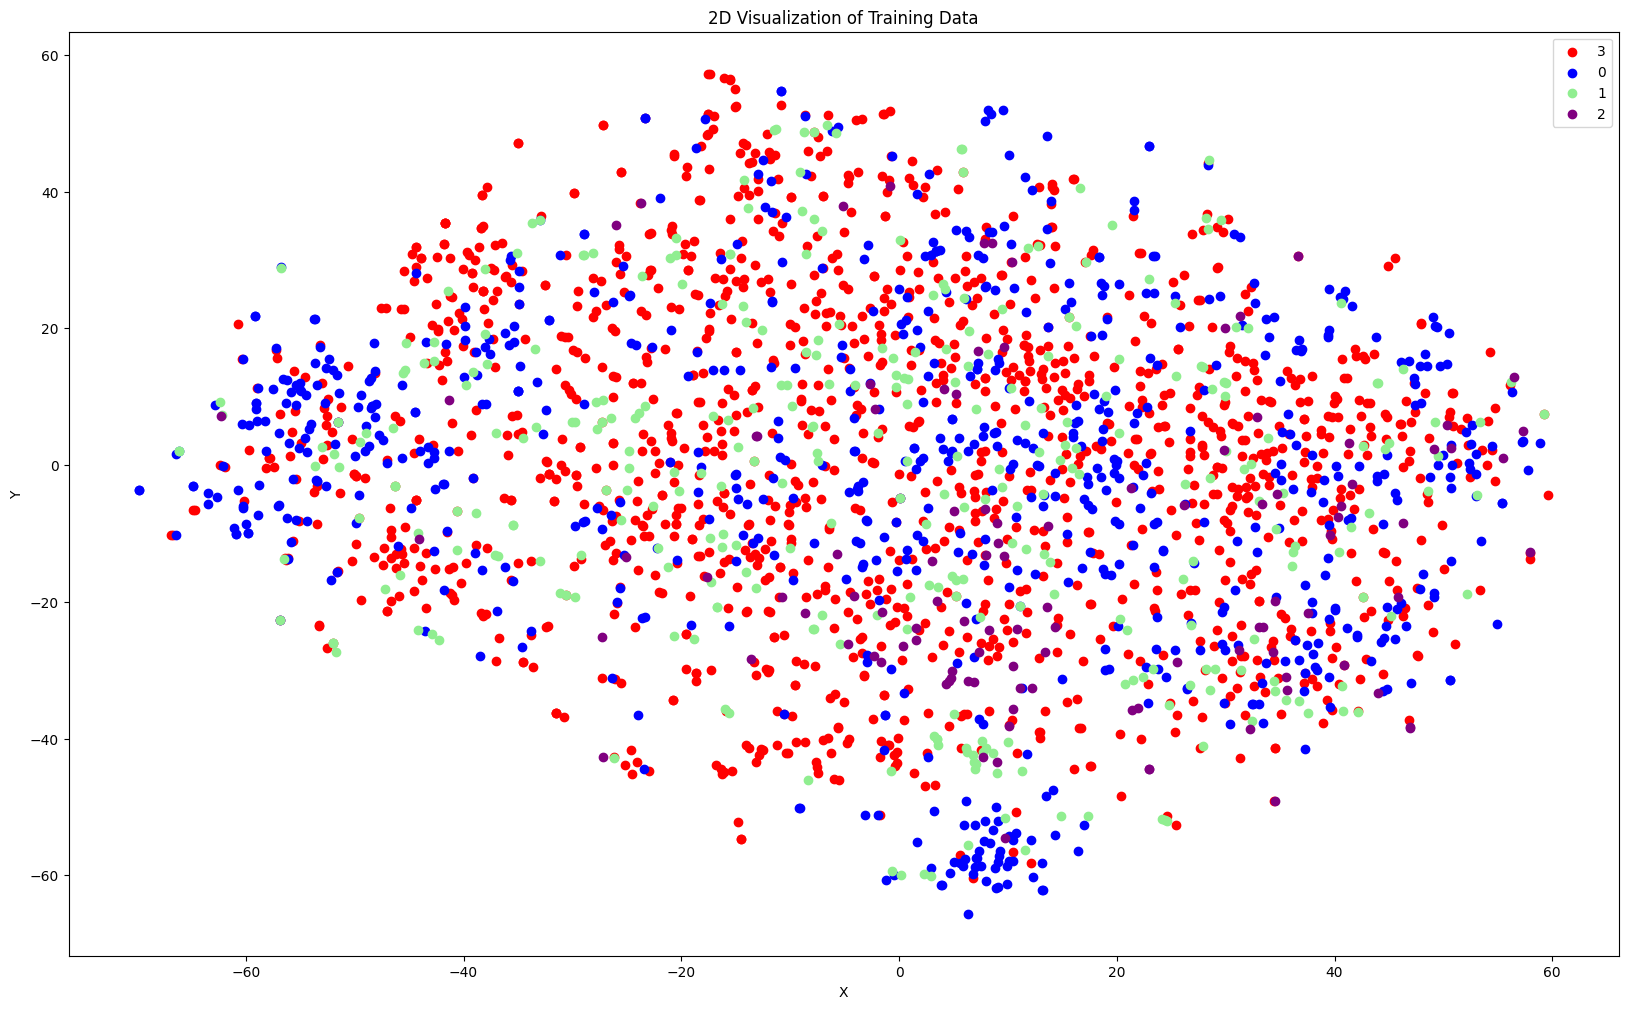

In [ ]:
# visualize
plt.figure(figsize=(20, 12))
color_map = {
    0: 'red', 1: 'blue', 2: 'lightgreen', 3: 'purple'
}

train_y = np.array(train_y)

for idx, label in enumerate(labels):
    plt.scatter(x=x_2d[train_y == label, 0], y=x_2d[train_y == label, 1], c=color_map[idx], marker='o', label=label)

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('2D Visualization of Training Data')
plt.show()

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         2510 non-null   object
 1   year         2510 non-null   int64 
 2   text         2510 non-null   object
 3   old_label    2510 non-null   object
 4   old_label_2  2510 non-null   object
 5   label        2510 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 117.8+ KB


In [ ]:
from imblearn.over_sampling import ADASYN
import pickle
import numpy as np

# Load vector embedding đã lưu
bert_features_path = '/content/drive/MyDrive/ESG/Code/Variable/bert_features.sav'
train_features = pickle.load(open(bert_features_path, 'rb'))

# Áp dụng ADASYN
adasyn = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=5)
train_features_balanced, train_y_balanced = adasyn.fit_resample(train_features, train_y)

# Kiểm tra kết quả sau khi ADASYN
print("Shape trước khi cân bằng:", train_features.shape, len(train_y))
print("Shape sau khi cân bằng:", train_features_balanced.shape, len(train_y_balanced))
print("Phân phối nhãn sau khi cân bằng:")
unique, counts = np.unique(train_y_balanced, return_counts=True)
print(dict(zip(unique, counts)))

# Lưu lại tập train đã cân bằng
balanced_features_path = '/content/drive/MyDrive/ESG/Code/Variable/balanced_train_features.sav'
balanced_labels_path = '/content/drive/MyDrive/ESG/Code/Variable/balanced_train_labels.sav'
pickle.dump(train_features_balanced, open(balanced_features_path, 'wb'))
pickle.dump(train_y_balanced, open(balanced_labels_path, 'wb'))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The ADASYN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Shape trước khi cân bằng: (2510, 768) 2510
Shape sau khi cân bằng: (5428, 768) 5428
Phân phối nhãn sau khi cân bằng:
{0: 1367, 1: 1354, 2: 1348, 3: 1359}


## **Train Classifier**

#### ***Logistic Regression Classifier***

In [ ]:
logisticReg = LogisticRegression(max_iter=100_000)

start = time.time()
logisticReg.fit(train_features, train_y)

print('Logistic Regression finish training after %d second' %(time.time() - start))

bert_logreg_path = '/content/drive/MyDrive/ESG/Code/Common Classifier Models/bert_logreg.sav'
pickle.dump(logisticReg, open(bert_logreg_path, 'wb'))

Logistic Regression finish training after 5 second


In [ ]:
# Đánh giá độ chính xác của mô hình Logistic Regression
y_pred = logisticReg.predict(test_features)

acc = np.mean(y_pred == np.array(test_y))

print('Accuracy: ', acc)

Accuracy:  0.6544585987261147


In [ ]:
print(classification_report(test_y, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.74      0.61      0.67       211
           1       0.45      0.44      0.45        89
           2       0.37      0.21      0.27        33
           3       0.68      0.80      0.73       295

    accuracy                           0.65       628
   macro avg       0.56      0.52      0.53       628
weighted avg       0.65      0.65      0.65       628



<Axes: >

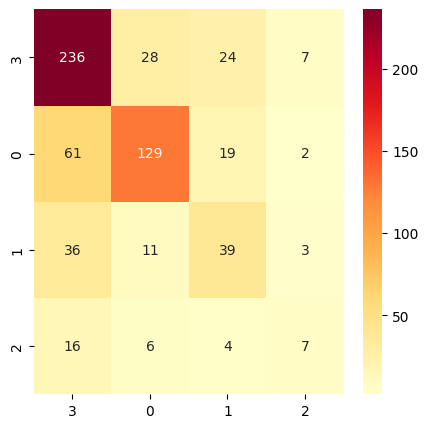

In [ ]:
# visualize bằng heat map
plt.figure(figsize=(5, 5))
conf_matrix = confusion_matrix(test_y, y_pred, labels=labels)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='YlOrRd' , xticklabels=labels, yticklabels=labels)

#### ***SVM Classifier***

In [ ]:
svm = SVC()

start = time.time()
svm.fit(train_features, train_y)
print('SVM classifier finish training after %d seconds' %(time.time() - start))

bert_svm_path = '/content/drive/MyDrive/ESG/Code/Common Classifier Models/bert_svm.sav'
pickle.dump(svm, open(bert_svm_path, 'wb'))

SVM classifier finish training after 2 seconds


In [ ]:
# Đánh giá độ chính xác
y_pred = svm.predict(test_features)

acc = np.mean(y_pred == np.array(test_y))
print('Accuracy: ', acc)

Accuracy:  0.6719745222929936


In [ ]:
print(classification_report(test_y, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.81      0.64      0.72       211
           1       0.75      0.07      0.12        89
           2       1.00      0.03      0.06        33
           3       0.62      0.95      0.75       295

    accuracy                           0.67       628
   macro avg       0.80      0.42      0.41       628
weighted avg       0.72      0.67      0.61       628



<Axes: >

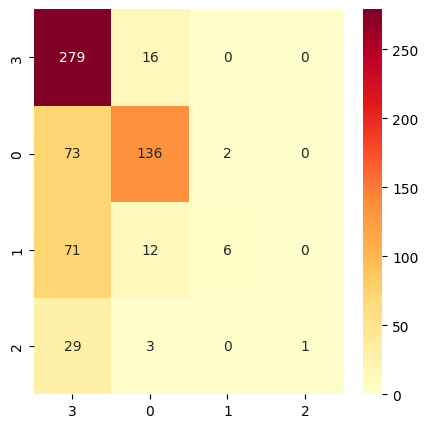

In [ ]:
# visualize bằng heat map
plt.figure(figsize=(5, 5))
conf_matrix = confusion_matrix(test_y, y_pred, labels=labels)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='YlOrRd' , xticklabels=labels, yticklabels=labels)

#### ***Random Forest Classifier***

Random Forest classifier finish training after 7 seconds
Accuracy:  0.5971337579617835
              precision    recall  f1-score   support

           0       0.84      0.36      0.51       211
           1       0.88      0.08      0.14        89
           2       1.00      0.03      0.06        33
           3       0.55      0.98      0.71       295

    accuracy                           0.60       628
   macro avg       0.82      0.36      0.35       628
weighted avg       0.72      0.60      0.53       628



<Axes: >

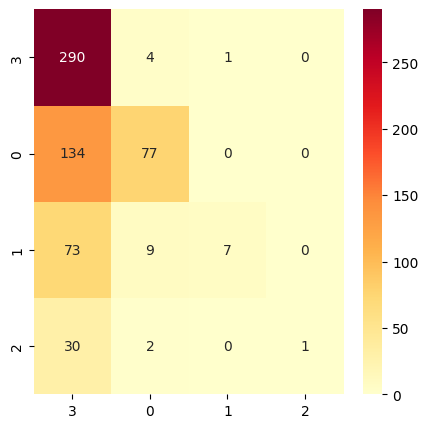

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

start = time.time()
rf.fit(train_features, train_y)
print('Random Forest classifier finish training after %d seconds' %(time.time() - start))

rf_path = '/content/drive/MyDrive/ESG/Code/Common Classifier Models/rf_model.sav'
pickle.dump(rf, open(rf_path, 'wb'))

# Evaluate accuracy
y_pred = rf.predict(test_features)

acc = np.mean(y_pred == np.array(test_y))
print('Accuracy: ', acc)

print(classification_report(test_y, y_pred, zero_division=1))

# Visualize using a heatmap
plt.figure(figsize=(5, 5))
conf_matrix = confusion_matrix(test_y, y_pred, labels=labels)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='YlOrRd', xticklabels=labels, yticklabels=labels)


#### ***Neural Networks Classifier***

Neural Networks classifier finish training after 8 seconds
Accuracy:  0.6735668789808917
              precision    recall  f1-score   support

           0       0.75      0.62      0.68       211
           1       0.48      0.30      0.37        89
           2       0.48      0.33      0.39        33
           3       0.68      0.86      0.76       295

    accuracy                           0.67       628
   macro avg       0.60      0.53      0.55       628
weighted avg       0.66      0.67      0.66       628



<Axes: >

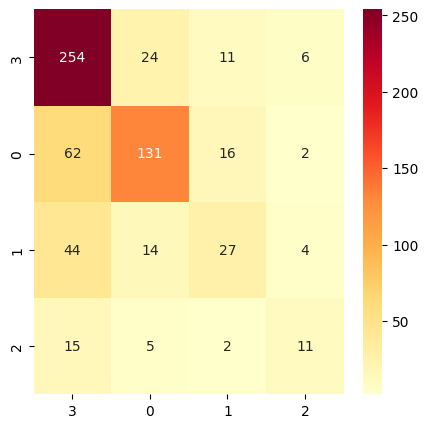

In [ ]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier()

start = time.time()
nn.fit(train_features, train_y)
print('Neural Networks classifier finish training after %d seconds' %(time.time() - start))

nn_path = '/content/drive/MyDrive/ESG/Code/Common Classifier Models/nn_model.sav'
pickle.dump(nn, open(nn_path, 'wb'))

# Evaluate accuracy
y_pred = nn.predict(test_features)

acc = np.mean(y_pred == np.array(test_y))
print('Accuracy: ', acc)

print(classification_report(test_y, y_pred, zero_division=1))

# Visualize using a heatmap
plt.figure(figsize=(5, 5))
conf_matrix = confusion_matrix(test_y, y_pred, labels=labels)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='YlOrRd', xticklabels=labels, yticklabels=labels)


#### DeepCNN

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.5280 - loss: 1.1066 - val_accuracy: 0.6210 - val_loss: 0.9418
Epoch 2/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6740 - loss: 0.8635 - val_accuracy: 0.6561 - val_loss: 0.8582
Epoch 3/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6873 - loss: 0.8032 - val_accuracy: 0.6640 - val_loss: 0.8547
Epoch 4/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6870 - loss: 0.7620 - val_accuracy: 0.6831 - val_loss: 0.8065
Epoch 5/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7471 - loss: 0.6542 - val_accuracy: 0.6927 - val_loss: 0.8402
Epoch 6/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7742 - loss: 0.5858 - val_accuracy: 0.6815 - val_loss: 0.8453
Epoch 7/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7818 - loss: 0.5681 - val_accuracy: 0.6561 - val_loss: 0.8629
Epoch 8/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8257 - loss: 0.4756 - val_accuracy: 0.7070 - val_loss: 0.8763
E

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7084 - loss: 1.3952
Test Loss: 1.4664, Test Accuracy: 0.7070
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Accuracy: 0.7070
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       211
           1       0.53      0.52      0.52        89
           2       0.36      0.39      0.38        33
           3       0.74      0.81      0.78       295

    accuracy                           0.71       628
   macro avg       0.61      0.60      0.60       628
weighted avg       0.71      0.71      0.71       628



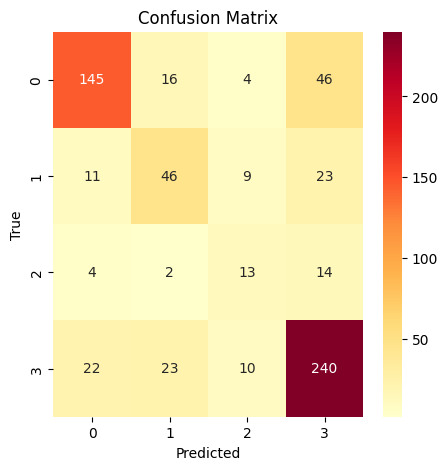

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 2️⃣ Xây dựng mô hình Deep CNN
model = Sequential([
    Dense(256, activation='relu', input_shape=(train_features.shape[1],)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')  # Output layer
])

# 3️⃣ Compile mô hình
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 4️⃣ Train mô hình
history = model.fit(
    train_features,
    train_y,
    epochs=30,
    batch_size=32,
    validation_data=(test_features, test_y),
    verbose=1
)

# 5️⃣ Lưu mô hình sau khi huấn luyện
model.save('/content/drive/MyDrive/ESG/Code/Common Classifier Models/deepcnn_model_3.h5')

# 6️⃣ Tải lại mô hình từ file đã lưu
loaded_model = load_model('/content/drive/MyDrive/ESG/Code/Common Classifier Models/deepcnn_model_3.h5')

# 7️⃣ Đánh giá mô hình vừa tải trên tập test
test_loss, test_accuracy = loaded_model.evaluate(test_features, test_y, verbose=1)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# 8️⃣ Dự đoán trên tập test
y_pred_probs = loaded_model.predict(test_features)
y_pred = np.argmax(y_pred_probs, axis=1)  # Lấy nhãn dự đoán

# Calculate accuracy
acc = accuracy_score(test_y, y_pred)
print(f'Accuracy: {acc:.4f}')

# Classification report (includes precision, recall, f1-score)
print(classification_report(test_y, y_pred, zero_division=1))

# Visualize confusion matrix using heatmap
plt.figure(figsize=(5, 5))
conf_matrix = confusion_matrix(test_y, y_pred)
labels = np.unique(test_y)  # Labels based on test_y
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='YlOrRd', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# **Fine-tune mô hình PhoBERT cho tác vụ classify**

In [ ]:
# Load BPE encoder
parser = argparse.ArgumentParser()
parser.add_argument(
    '--bpe-codes',
    default='/content/drive/MyDrive/ESG/Code/PhoBERT_base_transformers/bpe.codes',
    required=False,
    type=str,
    help='path to fastBPE BPE'
)

args, unknown = parser.parse_known_args()
bpe = fastBPE(args)

# Load the dictionary
vocab = Dictionary()
vocab.add_from_file('/content/drive/MyDrive/ESG/Code/PhoBERT_base_transformers/dict.txt')

In [ ]:
# Ví dụ, sử dụng BPE encoder để ánh xạ 1 câu thành một list subwords
bpe.encode('Nhiệt_độ ngoài trời là 37 độ C')

'Nhiệt_độ ngoài trời là 37 độ C'

In [ ]:

# ánh xạ từng subwords sang index của nó trong vocab
vocab.encode_line(' ' + 'Nhiệt_độ ngoài trời là 37 độ C' + ' ')

tensor([3170,  227, 1027,    8, 2810,  378,  968,    2], dtype=torch.int32)

### **Preprocess Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder
# encode label
le = LabelEncoder()
encoded_train_y = le.fit_transform(train_y)
print(le.classes_)

[0 1 2 3]


In [ ]:
# chia tập train thành 2 phần train và validate với tỉ lệ 9:1
from sklearn.model_selection import train_test_split

train_sents, val_sents, train_labels, val_labels = train_test_split(train_x, train_y, test_size=0.1, random_state = 42)

In [ ]:
# Thực hiện chuyển dataset ban đầu thành subword index
MAX_LEN = 256

train_ids = []
print('Processing train set ...')
for sent in tqdm(train_sents):
    subwords = ' ' + bpe.encode(sent) + ' '
    encoded_sent = vocab.encode_line(subwords, append_eos=True, add_if_not_exist=False).long()
    train_ids.append(encoded_sent)

val_ids = []
print('Processing test set ...')
for sent in tqdm(val_sents):
    subwords = ' ' + bpe.encode(sent) + ' '
    encoded_sent = vocab.encode_line(subwords, append_eos=True, add_if_not_exist=False).long()
    val_ids.append(encoded_sent)

Processing train set ...


  0%|          | 0/2259 [00:00<?, ?it/s]

Processing test set ...


  0%|          | 0/251 [00:00<?, ?it/s]

In [ ]:
# thêm padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_ids = pad_sequences(train_ids, maxlen=MAX_LEN, dtype='long', value=1, truncating='post', padding='post')
val_ids = pad_sequences(val_ids, maxlen=MAX_LEN, dtype='long', value=1, truncating='post', padding='post')

In [ ]:
# sau padding
len(train_ids[1])

256

In [ ]:
# Tạo mask để BERT không chú ý tới padding (pad id = 1)
train_masks = []
for sent in train_ids:
  mask = [int(token_id != 1) for token_id in sent]
  train_masks.append(mask)

val_masks = []
for sent in val_ids:
  mask = [int(token_id != 1) for token_id in sent]
  val_masks.append(mask)

In [ ]:
val_ids.shape

(251, 256)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

BATCH_SIZE = 4

# convert sang tensor
train_inputs = torch.tensor(train_ids)
val_inputs = torch.tensor(val_ids)

In [ ]:
train_labels = torch.tensor(train_labels.values)

In [ ]:
val_labels = torch.tensor(val_labels.values)

In [ ]:
train_masks = torch.tensor(train_masks)
val_masks = torch.tensor(val_masks)

# tạo data loader để train
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = SequentialSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=BATCH_SIZE)

val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=BATCH_SIZE)

In [ ]:
from transformers import RobertaForSequenceClassification, RobertaConfig, AdamW

NUM_CLASSES = len(labels)

# load file config
config = RobertaConfig.from_pretrained(
    '/content/drive/MyDrive/ESG/Code/PhoBERT_base_transformers/config.json',
    from_tf=False,
    num_labels=NUM_CLASSES,
    output_hidden_states=False
)

# load model
BERT_SA = RobertaForSequenceClassification.from_pretrained(
    'vinai/phobert-base',
    config=config
)

You are using a model of type bert to instantiate a model of type roberta. This is not supported for all configurations of models and can yield errors.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
BERT_SA.cuda()
print('Done')

Done


In [ ]:
# Hàm đánh giá độ chính xác
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    F1_score = f1_score(pred_flat, labels_flat, average='macro')

    return accuracy_score(pred_flat, labels_flat), F1_score

## **Training PhoBERT**

In [ ]:
import io
import copy

class EarlyStopping():
    def __init__(self, patience = 10, min_delta=0, restore_best_weights=True):
        '''
        patience = number of epochs not improve
        min_delta = the amount that counted as improvement (0 = any change is an improvement)
        '''
        self.patience = patience
        self.min_delta = min_delta
        self.restore_best_weights = restore_best_weights
        self.best_model = None
        self.best_loss = None
        self.counter = 0
        self.status = ""

    def __call__(self, model, val_loss):
        if self.best_loss == None:
            self.best_loss = val_loss
            self.best_model = copy.deepcopy(model)
        elif self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
            self.best_model.load_state_dict(model.state_dict())
        elif self.best_loss - val_loss < self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.status = f"Stopped on {self.counter}"
                if self.restore_best_weights:
                    model.load_state_dict(self.best_model.state_dict())
                return True
        self.status = f"{self.counter}/{self.patience}"
        return False

In [ ]:
# định nghĩa tham số
device = 'cuda'
epochs = 5
save_dir = '/content/drive/MyDrive/ESG/Code/Bert Fine-tune'
best_acc = 0
early_stopping = EarlyStopping()
# lưu lại lịch sử
losses = []
train_accs = []
val_accs = []
val_losses = []

# define optimizer
param_optimizer = list(BERT_SA.named_parameters())

no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=1e-5, correct_bias=False)

# Train theo từng epoch
for epoch_i in range(0, epochs):
  print('================= Epoch {} / {} ====================='.format(epoch_i + 1, epochs))
  print('Training ... ')

  # Tham số train
  total_loss = 0
  BERT_SA.train()
  train_accuracy = 0
  nb_train_steps = 0
  train_f1 = 0

  # Train từng batch
  for step, batch in enumerate(tqdm(train_dataloader)):
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)

    BERT_SA.zero_grad()
    outputs = BERT_SA(
        b_input_ids,
        token_type_ids=None,
        attention_mask=b_input_mask,
        labels=b_labels
    )
    loss = outputs[0]
    total_loss += loss.item()

    logits = outputs[1].detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    tmp_train_accuracy, tmp_train_f1 = flat_accuracy(logits, label_ids)
    train_accuracy += tmp_train_accuracy
    train_f1 += tmp_train_f1
    nb_train_steps += 1

    loss.backward()
    torch.nn.utils.clip_grad_norm_(BERT_SA.parameters(), 1.0)
    optimizer.step()

  # tính average loss và accuracy cho epoch đó
  avg_train_loss = total_loss / len(train_dataloader)
  losses.append(avg_train_loss)
  train_accs.append(train_accuracy/nb_train_steps)

  print('Accuracy: {0:.4f}'.format(train_accuracy/nb_train_steps))
  print(" F1 score: {0:.4f}".format(train_f1/nb_train_steps))
  print(" Average training loss: {0:.4f}".format(avg_train_loss))

  print("Running Validation...")

  BERT_SA.eval()

  # tham số validate
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0
  eval_f1 = 0

  # đánh giá
  for batch in tqdm(val_dataloader):
    batch = tuple(t.to(device) for t in batch)

    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
      outputs = BERT_SA(
          b_input_ids,
          token_type_ids=None,
          attention_mask=b_input_mask
      )
      logits = outputs[0]
      logits = logits.detach().cpu().numpy()
      label_ids = b_labels.to('cpu').numpy()

      tmp_eval_accuracy, tmp_eval_f1 = flat_accuracy(logits, label_ids)

      eval_accuracy += tmp_eval_accuracy
      eval_f1 += tmp_eval_f1
      nb_eval_steps += 1

  avg_val_acc = eval_accuracy/nb_eval_steps
  val_accs.append(avg_val_acc)
  print(" Accuracy: {0:.4f}".format(avg_val_acc))
  print(" F1 score: {0:.4f}".format(eval_f1/nb_eval_steps))

  # save checkpoint
  if (eval_f1/nb_eval_steps) > best_acc:
    # save checkpoint
    print('Saved model to %s' %save_dir)
    BERT_SA.save_pretrained(save_dir)
    best_acc = (eval_f1/nb_eval_steps)

#   if early_stopping is not None:
#     if early_stopping(BERT_SA, (eval_f1/nb_eval_steps)):
#       print(f"Early stopping at epoch {epoch_i + 1}.")
#       break

print("Training complete!")

================= Epoch 1 / 5 =====================
Training ... 


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/565 [00:00<?, ?it/s]

Accuracy: 0.6664
 F1 score: 0.5264
 Average training loss: 0.9188
Running Validation...


  0%|          | 0/63 [00:00<?, ?it/s]

 Accuracy: 0.6839
 F1 score: 0.5717
Saved model to /content/drive/MyDrive/ESG/Code/Bert Fine-tune
================= Epoch 2 / 5 =====================
Training ... 


  0%|          | 0/565 [00:00<?, ?it/s]

Accuracy: 0.7566
 F1 score: 0.6542
 Average training loss: 0.7107
Running Validation...


  0%|          | 0/63 [00:00<?, ?it/s]

 Accuracy: 0.7500
 F1 score: 0.6528
Saved model to /content/drive/MyDrive/ESG/Code/Bert Fine-tune
================= Epoch 3 / 5 =====================
Training ... 


  0%|          | 0/565 [00:00<?, ?it/s]

Accuracy: 0.8164
 F1 score: 0.7377
 Average training loss: 0.6119
Running Validation...


  0%|          | 0/63 [00:00<?, ?it/s]

 Accuracy: 0.7738
 F1 score: 0.6863
Saved model to /content/drive/MyDrive/ESG/Code/Bert Fine-tune
================= Epoch 4 / 5 =====================
Training ... 


  0%|          | 0/565 [00:00<?, ?it/s]

Accuracy: 0.8544
 F1 score: 0.7905
 Average training loss: 0.5478
Running Validation...


  0%|          | 0/63 [00:00<?, ?it/s]

 Accuracy: 0.7619
 F1 score: 0.6744
================= Epoch 5 / 5 =====================
Training ... 


  0%|          | 0/565 [00:00<?, ?it/s]

Accuracy: 0.8929
 F1 score: 0.8431
 Average training loss: 0.4506
Running Validation...


  0%|          | 0/63 [00:00<?, ?it/s]

 Accuracy: 0.7778
 F1 score: 0.6925
Saved model to /content/drive/MyDrive/ESG/Code/Bert Fine-tune
Training complete!


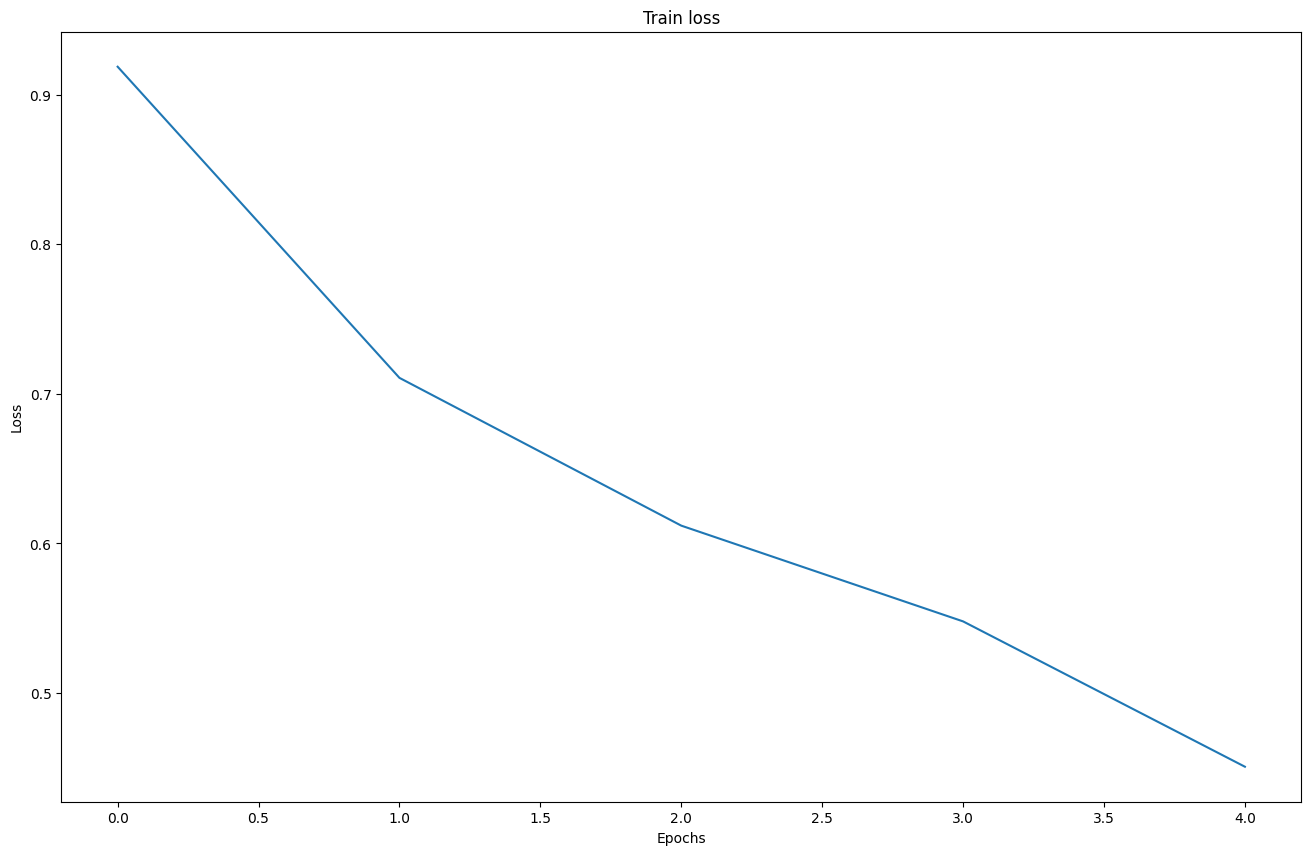

In [ ]:
# đồ thị loss
plt.figure(figsize=(16, 10))
plt.plot(range(len(losses)), losses)
plt.title('Train loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## **Testing PhoBERT**

In [ ]:
test_x = test_df['text']
test_y = test_df['label']

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# # encode label
# le = LabelEncoder()
# encoded_test_y = le.fit_transform(test_y)
# print(le.classes_)

In [ ]:
# chia tập train thành 2 phần train và validate với tỉ lệ 9:1
# from sklearn.model_selection import train_test_split

# train_sents, val_sents, train_labels, val_labels = train_test_split(test_x, encoded_train_y, test_size=0.1, random_state = 42)

In [ ]:
# Thực hiện chuyển dataset ban đầu thành subword index
MAX_LEN = 256

test_ids = []
print('Processing text set ...')
for sent in tqdm(test_x):
  subwords = ' ' + bpe.encode(sent) + ' '
  encoded_sent = vocab.encode_line(subwords, append_eos=True, add_if_not_exist=False).long()
  test_ids.append(encoded_sent)

Processing text set ...


  0%|          | 0/628 [00:00<?, ?it/s]

In [ ]:
# thêm padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

test_ids = pad_sequences(test_ids, maxlen=MAX_LEN, dtype='long', value=1, truncating='post', padding='post')

In [ ]:
# sau padding
test_ids[1]

array([ 9788,   720,  2665,  2301,  3959, 18116,     6,  2301,   418,
       25479,  1384,    27,  7765, 18116,    15,     9,  3959, 24105,
        1395,     4,  1251,  2289,  2301,   418,  4311,   272,   156,
          75,    13,   336,   119,  1973,  4770,  3884,  1626,   178,
           6, 10210,  9135,   510, 62695,  1384,     4,   878, 11245,
        1881,     4,    80,   790,   470,    84,  9479,  5976,  2657,
       34139,  1187,     4, 40415,  7038,  1073, 12155,    13,   904,
       24468,     6,  3959, 24105, 21473,     2,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,

In [ ]:
# Tạo mask để BERT không chú ý tới padding (pad id = 1)
test_masks = []
for sent in test_ids:
  mask = [int(token_id != 1) for token_id in sent]
  test_masks.append(mask)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

BATCH_SIZE = 4

# convert sang tensor
test_inputs = torch.tensor(test_ids)
test_labels = torch.tensor(test_y)
test_masks = torch.tensor(test_masks)

# tạo data loader để train
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler = test_sampler, batch_size=BATCH_SIZE)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Set the model to evaluation mode
BERT_SA.eval()

# Initialize empty lists to store predicted labels and true labels
predicted_labels = []
true_labels = []

# Predict the labels for the test data
for batch in tqdm(test_dataloader):
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
        outputs = BERT_SA(
            b_input_ids,
            token_type_ids=None,
            attention_mask=b_input_mask
        )
        logits = outputs[0]
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Convert logits to class labels
        batch_predicted_labels = np.argmax(logits, axis=1)
        predicted_labels.extend(batch_predicted_labels)
        true_labels.extend(label_ids)

# Attach the predicted labels to the test_df dataframe
test_df['predicted_label'] = predicted_labels

# Print the classification report
print(classification_report(true_labels, predicted_labels))

# Print the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_mat)


  0%|          | 0/157 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       211
           1       0.74      0.67      0.71        89
           2       0.82      0.55      0.65        33
           3       0.82      0.88      0.85       295

    accuracy                           0.82       628
   macro avg       0.81      0.73      0.76       628
weighted avg       0.82      0.82      0.81       628

Confusion Matrix:
[[174   8   0  29]
 [  9  60   1  19]
 [  3   3  18   9]
 [ 21  10   3 261]]


In [ ]:
import pandas as pd

# Gắn thêm nhãn gốc vào DataFrame test_df (nếu chưa có)
test_df['true_label'] = true_labels

# Tạo cột đánh dấu các mẫu dự đoán sai
test_df['is_incorrect'] = test_df['true_label'] != test_df['predicted_label']

# Lọc ra các mẫu sai
incorrect_predictions = test_df[test_df['is_incorrect']]

# Lưu các kết quả sai vào file Excel
incorrect_predictions_path = '/content/drive/MyDrive/ESG/Code/incorrect_predictions.xlsx'
incorrect_predictions.to_excel(incorrect_predictions_path, index=False)

print(f"Kết quả sai đã được lưu tại: {incorrect_predictions_path}")


Kết quả sai đã được lưu tại: /content/drive/MyDrive/ESG/Code/incorrect_predictions.xlsx
